In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2025-05-19 / Aki Taanila


# RSI - laskentamenetelmien vertailua

Tässä muistiossa noudetaan dataa Yahoo Finance -palvelusta **yfinance**-paketin avulla. **yfinance**-kirjaston asennus Minicondan ja Anacondan käyttäjille komentorivin kautta: `pip install yfinance`. Lisätietoa https://github.com/ranaroussi/yfinance.

Jos tiedon hakuu Yahoo Finance -palvelusta ei onnistu, niin kannattaa päivittää yfinance uusimpaan versioon. Minicondan/Anacondan komentorivillä päivityksen voi tehdä komennolla `pip install yfinance --upgrade`

Lisätietoa RSI:stä: https://www.investopedia.com/terms/r/rsi.asp

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
sns.set_style('whitegrid')

rsi0 noudattaa laskennassa sivun https://www.macroption.com/rsi-calculation/ ohjetta (keskiarvojen laskenta yksinkertaisena liukuvana keskiarvona).

In [3]:
# Keskiarvot yksinkertaisena liukuvana

def rsi0(stock, span):
    
    muutos = stock['Close'].diff()
    
    u = muutos.clip(lower = 0) # positiiviset muutokset
    d = muutos.clip(upper = 0).abs() # negatiiviset muutokset
    
    avgu = u.rolling(span).mean() # positiivisten muutosten liukuva keskiarvo
    avgd = d.rolling(span).mean() # negatiivisten muutosten liukuva keskiarvo

    rs = avgu/avgd # suhteellinen voima (relative strength)

    stock['RSI0'] = (100 - (100/(1 + rs))) # suhteellinen voimaindeksi (RSI)

    # Kaavio
    stock['RSI0'].plot(figsize = (12, 5), label = 'yksinkertainen liukuva', legend = True)
    plt.ylim(0, 100)
    plt.axhline(30, color = 'r', linestyle = '--')
    plt.axhline(70, color = 'r', linestyle = '--')
    plt.ylabel('RSI')

rsi1 noudattaa laskennassa sivun https://www.macroption.com/rsi-calculation/ ohjetta (keskiarvojen laskenta eksponentiaalisella tasoituksella).

In [4]:
# Keskiarvot eksponentiaalisella tasoituksella

def rsi1(stock, span):
    
    muutos = stock['Close'].diff()
    
    u = muutos.clip(lower = 0) # positiiviset muutokset
    d = muutos.clip(upper = 0).abs() # negatiiviset muutokset
    
    avgu = u.ewm(span = span, adjust = False).mean() # positiivisten muutosten liukuva keskiarvo
    avgd = d.ewm(span = span, adjust = False).mean() # negatiivisten muutosten liukuva keskiarvo

    rs = avgu/avgd # suhteellinen voima (relative strength)

    stock['RSI1'] = (100 - (100/(1 + rs))) # suhteellinen voimaindeksi (RSI)
    
    # Kaavio
    stock['RSI1'].plot(figsize = (12, 5), label = 'eksponentiaalinen', legend = True)
    plt.ylim(0, 100)
    plt.axhline(30, color = 'r', linestyle = '--')
    plt.axhline(70, color = 'r', linestyle = '--')
    plt.ylabel('RSI')

rs2 on kuten rs1, mutta keskiarvojen laskentaan tehty sivun https://stackoverflow.com/questions/37924377/does-pandas-calculate-ewm-wrong suosittelemat korjaukset.

In [5]:
# Keskiarvot eksponentiaalisella tasoituksella, alkupäähän korjaus

def rsi2(stock, span):
    
    muutos = stock['Close'].diff()
    
    u = muutos.clip(lower = 0) # positiiviset muutokset
    u_sma = u.rolling(window=span, min_periods=span).mean()[:span]
    u_rest = u[span:]
    u = pd.concat([u_sma, u_rest])
    
    d = muutos.clip(upper = 0).abs() # negatiiviset muutokset
    d_sma = d.rolling(window=span, min_periods=span).mean()[:span]
    d_rest = d[span:]
    d = pd.concat([d_sma, d_rest])
    
    avgu = u.ewm(span = span, adjust = False, min_periods=span).mean() # positiivisten muutosten liukuva keskiarvo
    avgd = d.ewm(span = span, adjust = False, min_periods=span).mean() # negatiivisten muutosten liukuva keskiarvo

    rs = avgu/avgd # suhteellinen voima (relative strength)

    stock['RSI2'] = (100 - (100/(1 + rs))) # suhteellinen voimaindeksi (RSI)

    # Kaavio
    stock['RSI2'].plot(figsize = (12, 5), label = 'eksponentiaalinen korj.', legend = True)
    plt.ylim(0, 100)
    plt.axhline(30, color = 'r', linestyle = '--')
    plt.axhline(70, color = 'r', linestyle = '--')
    plt.ylabel('RSI')

rsi3 noudattaa laskennassa sivun https://www.macroption.com/rsi-calculation/ ohjetta (keskiarvojen laskenta Wilderin tasoituksella).

In [6]:
# Keskiarvot Wilderin tasoituksella

def rsi3(stock, span):
    
    muutos = stock['Close'].diff()
    
    u = muutos.clip(lower = 0) # positiiviset muutokset
    d = muutos.clip(upper = 0).abs() # negatiiviset muutokset
    
    avgu = u.ewm(alpha = 1/span, adjust = False).mean() # positiivisten muutosten liukuva keskiarvo
    avgd = d.ewm(alpha = 1/span, adjust = False).mean() # negatiivisten muutosten liukuva keskiarvo

    rs = avgu/avgd # suhteellinen voima (relative strength)

    stock['RSI3'] = (100 - (100/(1 + rs))) # suhteellinen voimaindeksi (RSI)

    # Kaavio
    stock['RSI3'].plot(figsize = (12, 5), label = 'Wilder', legend = True)
    plt.ylim(0, 100)
    plt.axhline(30, color = 'r', linestyle = '--')
    plt.axhline(70, color = 'r', linestyle = '--')
    plt.ylabel('RSI')

In [7]:
stock = yf.download('ELISA.HE', start = '2025-1-1')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


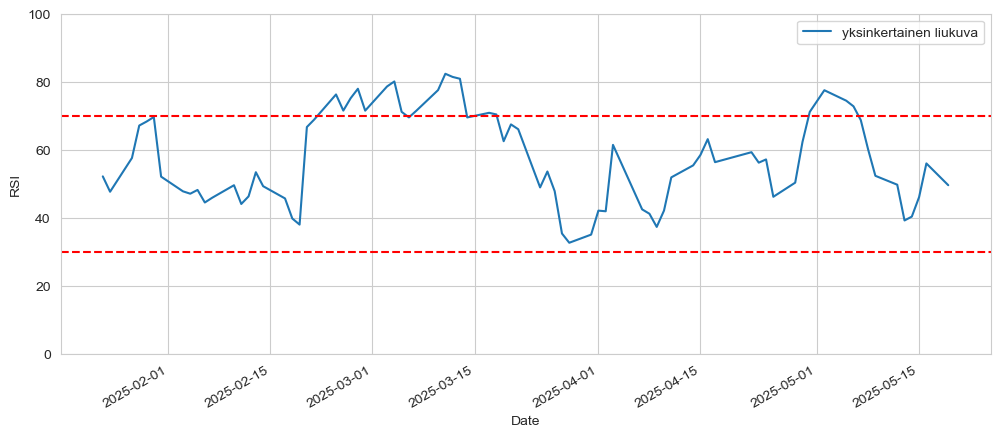

In [8]:
rsi0(stock, 14)

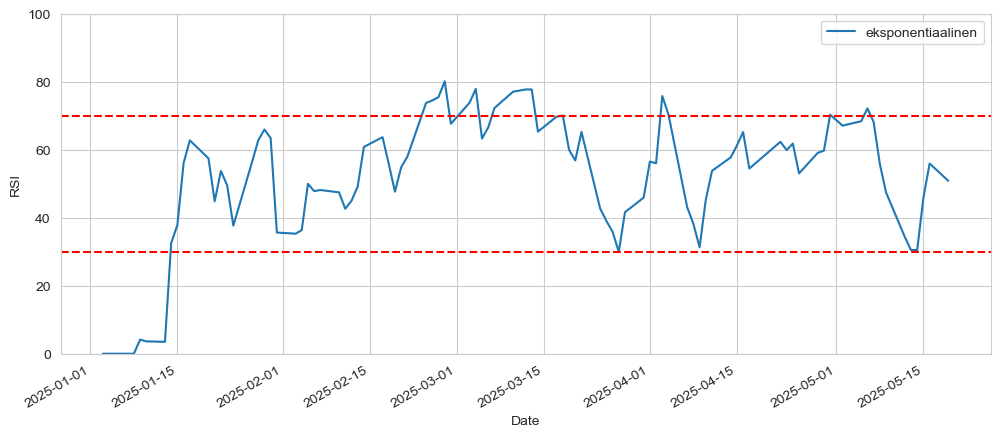

In [9]:
rsi1(stock, 14)

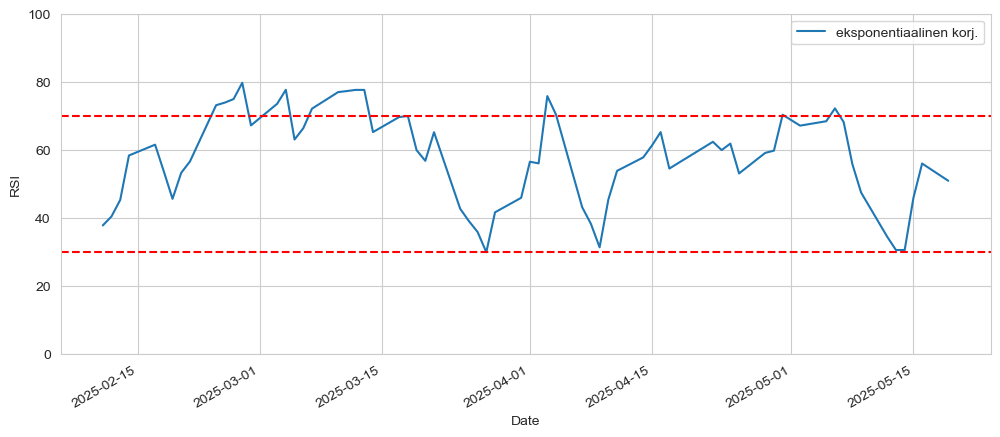

In [10]:
rsi2(stock, 14)

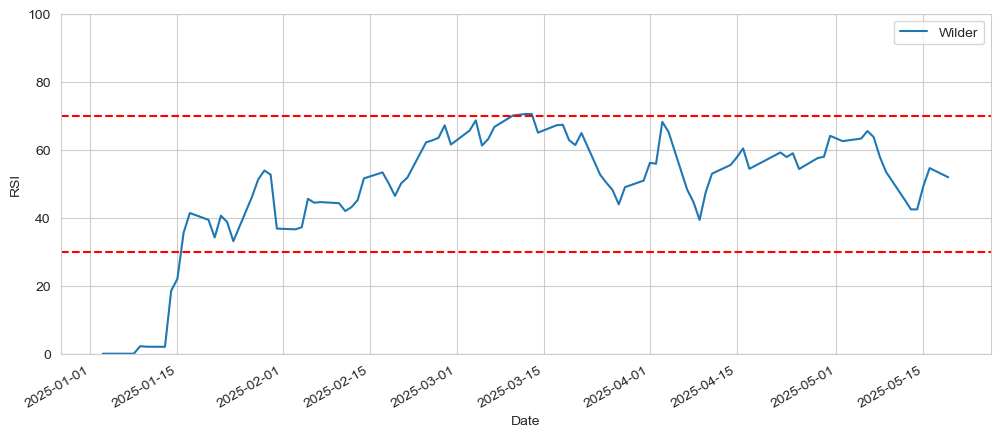

In [11]:
rsi3(stock, 14)